### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Preparing and Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/ML_Project(Saiqa)/heart.csv')

In [26]:
# loading the csv data
heart_data = pd.read_csv('/content/heart.csv')

### Preprocessing

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


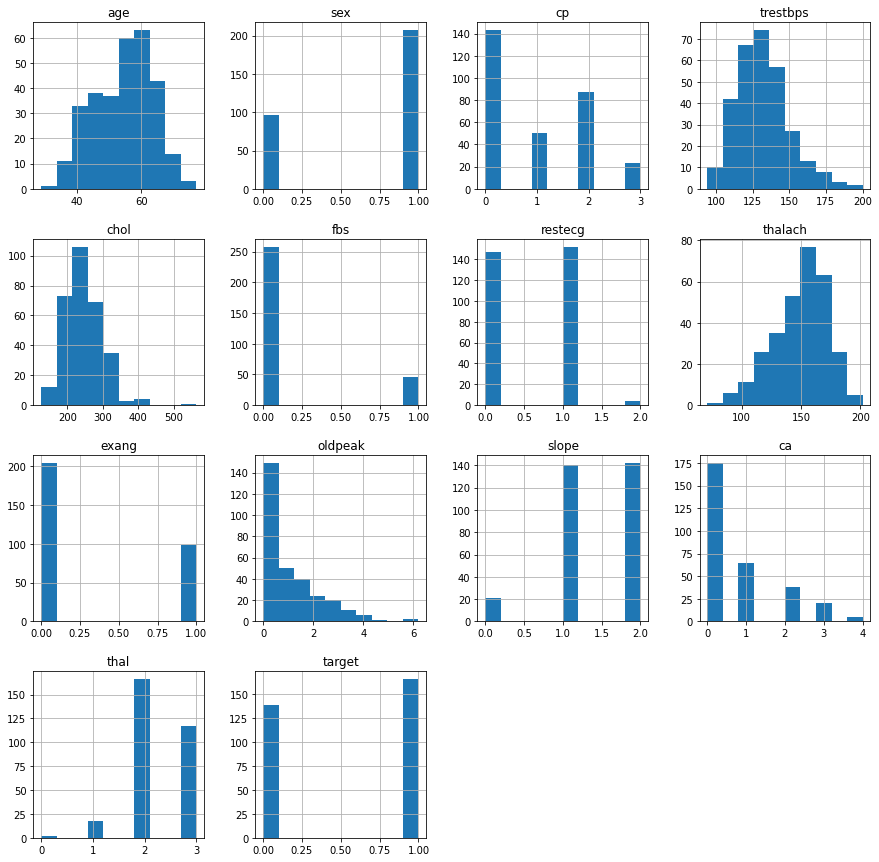

In [27]:
p = heart_data.hist(figsize = (15,15))

In [28]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target

In [29]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [30]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

# standardization 
X= object.fit_transform(X) 
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [32]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### Splitting the Data into Training data & Test Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### MODEL TRAINING

###SVC



In [54]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)


SVC(kernel='poly')

In [55]:
X_train_prediction = svm.predict(X_train)
svm_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100.0
print('Accuracy on Training data : ',svm_training_data_accuracy)

Accuracy on Training data :  91.73553719008265


In [56]:
svm_X_test_prediction = svm.predict(X_test)
svm_accuracy_test=svm.score(X_test, Y_test)*100.0
print('Test Accuracy: %.3f' % svm_accuracy_test)



Test Accuracy: 81.967


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,svm_X_test_prediction )
print(confusion_matrix)

[[21  7]
 [ 4 29]]


In [58]:
print(classification_report(Y_test,svm_X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



### LogisticRegression

In [35]:
model=LogisticRegression(random_state=0)  

In [36]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [37]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
Lr_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100.0

In [38]:
print('Accuracy on Training data : ', Lr_training_data_accuracy)

Accuracy on Training data :  84.71074380165288


In [39]:
# accuracy on test data
lr_X_test_prediction = model.predict(X_test)
lr_test_data_accuracy = accuracy_score(lr_X_test_prediction, Y_test)*100.0

In [40]:
print('Accuracy on Test data : ', lr_test_data_accuracy)

Accuracy on Test data :  78.68852459016394


### KNeighbourClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=23)

In [42]:
# accuracy on training data
X_train_prediction = knn.predict(X_train)
Knn_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100.0

In [43]:
print('Accuracy on Training data : ', Knn_training_data_accuracy)

Accuracy on Training data :  83.88429752066115


In [44]:
# accuracy on test data
knn_X_test_prediction = knn.predict(X_test)
knn_test_acc = accuracy_score(knn_X_test_prediction, Y_test)*100.0

In [45]:
print('Accuracy on Test data : ', knn_test_acc)


Accuracy on Test data :  80.32786885245902


In [46]:
n_neighbors=[]
accuracy=[]
for neighbors_size in range(3,30,4):

        classifier = KNeighborsClassifier(n_neighbors=neighbors_size)
        classifier.fit(X_train, Y_train)
        y_pred = classifier.predict(X_test)
        acuracy= accuracy_score(Y_test, y_pred)
        accuracy.append(acuracy)
        n_neighbors.append(neighbors_size)
        max_accuracy=max(accuracy)
        index=accuracy.index(max_accuracy)

print('The max accuracy is : '+str(accuracy[index]*100))
print('where best k value is :' +str(n_neighbors[index]))


The max accuracy is : 81.9672131147541
where best k value is :7


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,knn_X_test_prediction )
print(confusion_matrix)

[[20  8]
 [ 4 29]]


In [48]:
print(classification_report(Y_test,knn_X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5)

In [50]:
# accuracy on training data
X_train_prediction = dt.predict(X_train)
dt_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100.0
print('Accuracy on Training data : ', dt_training_data_accuracy)

Accuracy on Training data :  93.80165289256198


In [51]:
# accuracy on test data
dt_X_test_prediction = dt.predict(X_test)
dt_test_acc = accuracy_score(dt_X_test_prediction, Y_test)*100.0
print('Accuracy on Test data : ', dt_test_acc)

Accuracy on Test data :  77.04918032786885


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,dt_X_test_prediction )
print(confusion_matrix)

[[20  8]
 [ 6 27]]


In [53]:
print(classification_report(Y_test,dt_X_test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### Perceptron


In [59]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
acc=[]
l_rate=np.arange(start=0.01, stop=0.5, step=0.1,dtype=float)
for i in range(len(l_rate)):
  ppn = Perceptron(eta0=l_rate[i], random_state=2)
  ppn.fit(X_train, Y_train)

In [60]:
# accuracy on training data
X_train_prediction = ppn.predict(X_train)
ppn_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100.0
print('Accuracy on Training data : ', ppn_training_data_accuracy)


Accuracy on Training data :  78.92561983471074


In [61]:
# accuracy on test data
ppn_X_test_prediction = ppn.predict(X_test)
perceptron_accuracy_test=accuracy_score(ppn_X_test_prediction, Y_test)*100.0
print('Accuracy with perceptron: %.3f' % perceptron_accuracy_test)

Accuracy with perceptron: 63.934


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,ppn_X_test_prediction )
print(confusion_matrix)

[[16 12]
 [10 23]]


In [63]:
print(classification_report(Y_test,ppn_X_test_prediction))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        28
           1       0.66      0.70      0.68        33

    accuracy                           0.64        61
   macro avg       0.64      0.63      0.63        61
weighted avg       0.64      0.64      0.64        61



### Grid Search CV

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [65]:
model=DecisionTreeClassifier()

In [66]:
criterion = ['gini','entropy']
max_depth=[1,3,5,None]
splitter=['best','random']

In [67]:
grid=GridSearchCV(estimator=model,cv=3,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [68]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'splitter': ['best', 'random']})

In [69]:
print(grid.best_score_*100.0)

79.35699588477367


In [70]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}


In [ ]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Summary

In [71]:
from tabulate import tabulate

In [72]:
data = [["Logistic Regression", Lr_training_data_accuracy,lr_test_data_accuracy], 
        ["KNeighbors Classifier", Knn_training_data_accuracy,knn_test_acc], 
        ["Desision Tree", dt_training_data_accuracy,dt_test_acc], 
        ["Perceptron", ppn_training_data_accuracy,perceptron_accuracy_test],
        ["SVC",Knn_training_data_accuracy,svm_accuracy_test]]
  
#define header names
col_names = ["Classifier","Train Accuracy" ,"Test Accuracy"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid", showindex="always"))



╒════╤═══════════════════════╤══════════════════╤═════════════════╕
│    │ Classifier            │   Train Accuracy │   Test Accuracy │
╞════╪═══════════════════════╪══════════════════╪═════════════════╡
│  0 │ Logistic Regression   │          84.7107 │         78.6885 │
├────┼───────────────────────┼──────────────────┼─────────────────┤
│  1 │ KNeighbors Classifier │          83.8843 │         80.3279 │
├────┼───────────────────────┼──────────────────┼─────────────────┤
│  2 │ Desision Tree         │          93.8017 │         77.0492 │
├────┼───────────────────────┼──────────────────┼─────────────────┤
│  3 │ Perceptron            │          78.9256 │         63.9344 │
├────┼───────────────────────┼──────────────────┼─────────────────┤
│  4 │ SVC                   │          83.8843 │         81.9672 │
╘════╧═══════════════════════╧══════════════════╧═════════════════╛


### Saving the Model

In [73]:
import pickle

In [74]:
filename = 'heart_disease_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [75]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [79]:
input_data = (5,166,72,19,175,25.8,0.587,51, 12, 34, 13, 1, 2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has not heart disease')
else:
  print('The person has heart disease')

[0]
The person has not heart disease
